In [96]:
import os

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import pandas as pd
import numpy as np

In [69]:
err_stats = {}
for folder in os.listdir(".."):
    if folder.startswith("report_"):
        ttype = folder.split("_")[1]

        files = os.listdir("../"+folder)
        success = [x for x in files if x.endswith("json")]
        err = [x for x in files if x.endswith("err")]
        
        err_stats[ttype] = [len(success), len(err)]

df = pd.DataFrame(err_stats, index=["success", "errors"])
df.sort_values("success", axis=1, ascending=False, inplace=True)
df

,clean,trojan,dropper,backdoor,ransomware,rat,coinminer,keylogger
success,25291,12780,11150,11062,9627,9479,6893,4574
errors,569,347,124,26,386,57,2971,3034


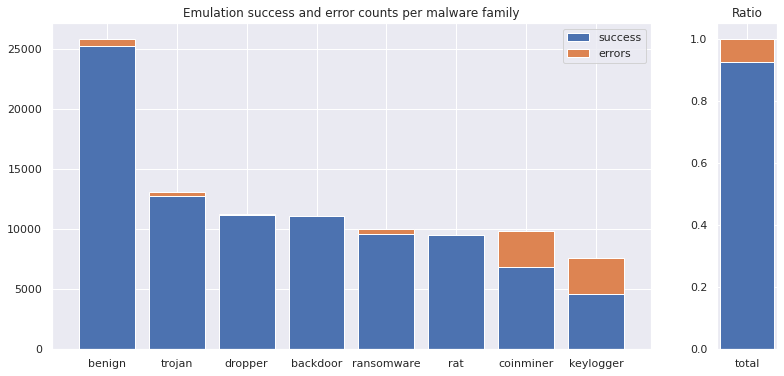

In [195]:
fig, ax = plt.subplots(1, 2, gridspec_kw={"width_ratios": [10,1]}, figsize=(13, 6))

success = df.loc["success"]
errors = df.loc["errors"]

ax[0].bar(x=["benign"]+ success.index[1:].tolist(), height=success.values)
ax[0].bar(x=["benign"]+ errors.index[1:].tolist(), height=errors.values, bottom=success.values)
ax[0].set_title("Emulation success and error counts per malware family", fontsize=12)
ax[0].legend(["success", "errors"])

total = df.sum(axis=1)
success_percentage = total["success"]/total.sum()
error_percentage = total["errors"]/total.sum()

ax[1].bar(x="total", height=success_percentage, width=0.4)
ax[1].bar(x="total", height=error_percentage, bottom=success_percentage, width=0.4)
_ = ax[1].set_title("Ratio", fontsize=12)
#ax[1].yaxis.set_label_position("right")
#ax[1].yaxis.tick_right()